In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

import feature_util
from feature_util import readPickle, invertMinMax

features = ['cn', 'log10_distanceToNearestCNV', 'logR', 'changepoint', 'log10_segmentSize',
            'loh', 'allelicImbalance', 'log10_distToCentromere', 'replication_timing']
order_of_chromosomes = [4,7,2,5,6,13,3,8,9,18,12,1,10,11,14,22,19,17,20,16,15,21]


In [2]:

list_of_ids = glob.glob("/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/*.pickle")
for sample in list_of_ids:
    df = readPickle(sample)
    #print(np.shape(df))
    if np.shape(df) == ():
        print(sample)
        list_of_ids.remove(sample)
print(len(list_of_ids))

/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/CPCT02070111T.pickle
/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/CPCT02040228T.pickle
/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/WIDE01011080T.pickle
/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/WIDE01010541T.pickle
/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/CPCT02020267T.pickle
/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/CPCT02050114T.pickle
/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/CPCT02020867T.pickle
/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/CPCT02010406TII.pickle
/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/WIDE01010539T.pickle
/Users/au589901/PycharmProjects/CN_Signatures/data/output/make_square_images/CPCT02050202T.pickle
/Users/au589901/Py

In [3]:

df = readPickle(list_of_ids[2])

layers_for_plot = []
for i in range(len(features)):
    print(features[i])
    for_plot = pd.DataFrame(df[:, :, i])
    for_plot.index = order_of_chromosomes
    #for_plot = for_plot.applymap(lambda x: invertMinMax(x))
    layers_for_plot.append(for_plot)

cn
log10_distanceToNearestCNV
logR
changepoint
log10_segmentSize
loh
allelicImbalance
log10_distToCentromere
replication_timing


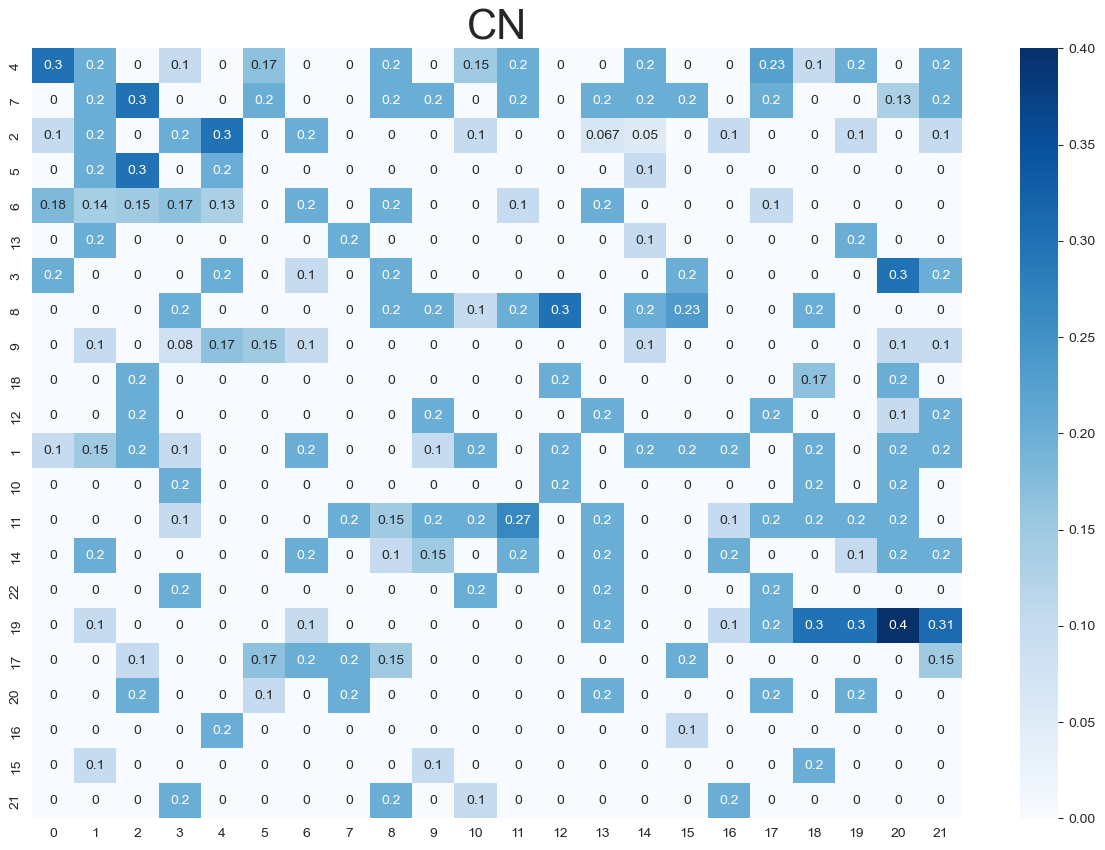

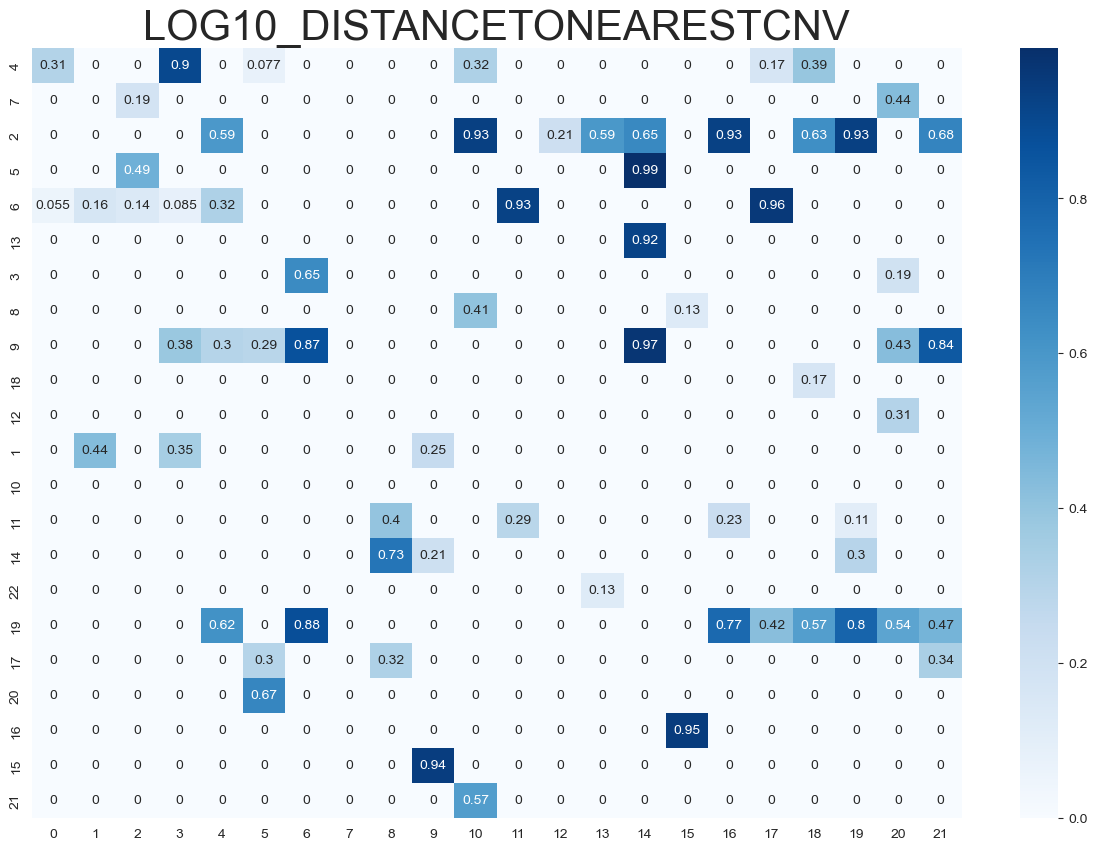

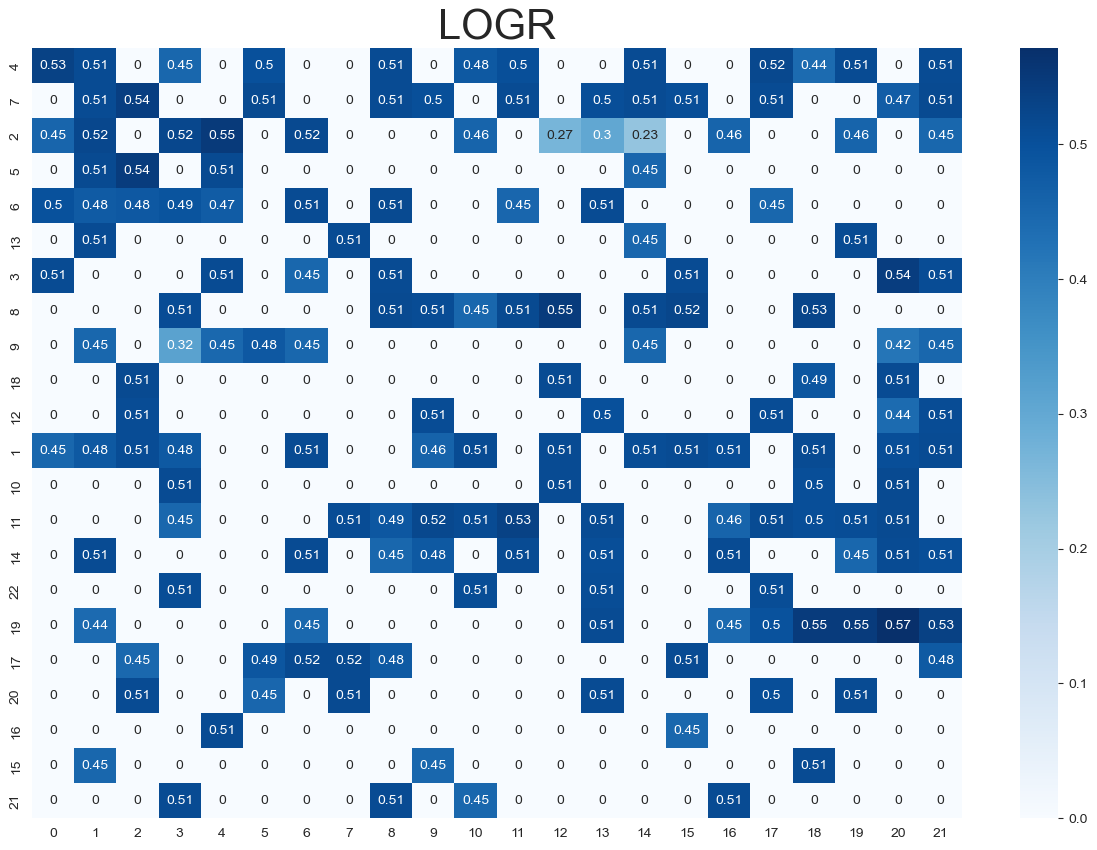

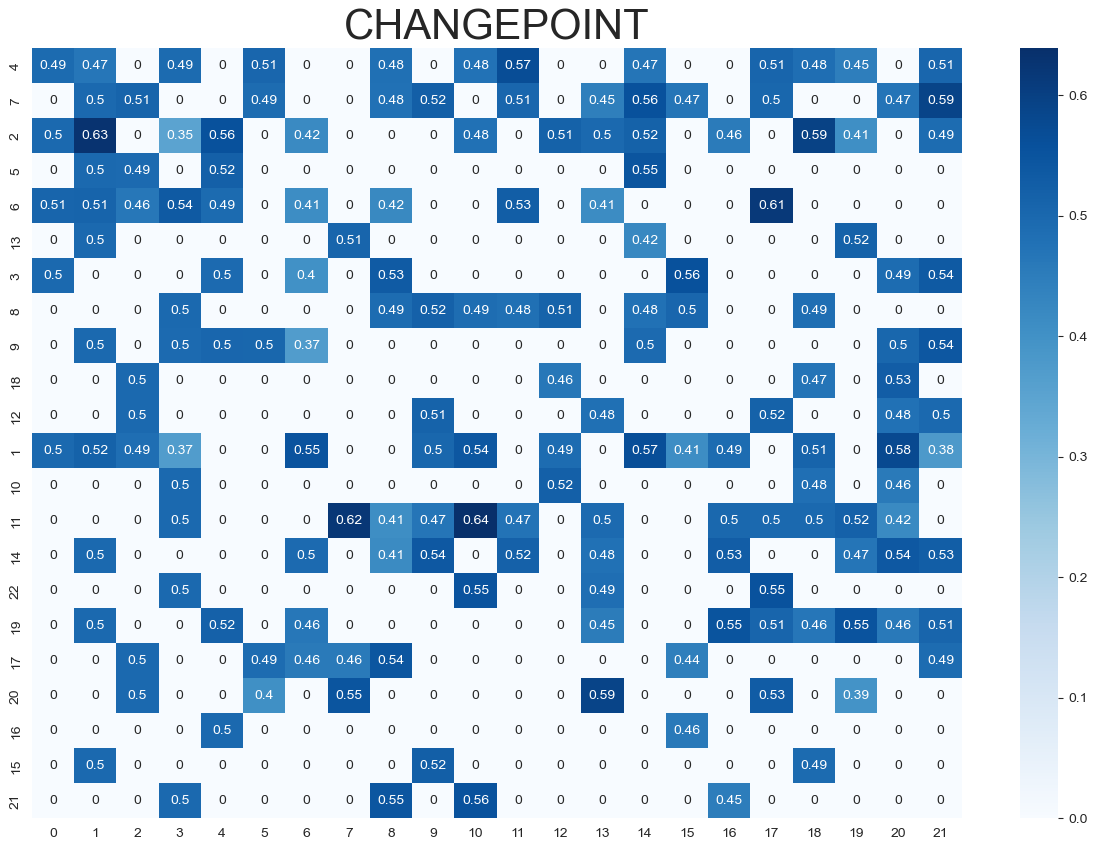

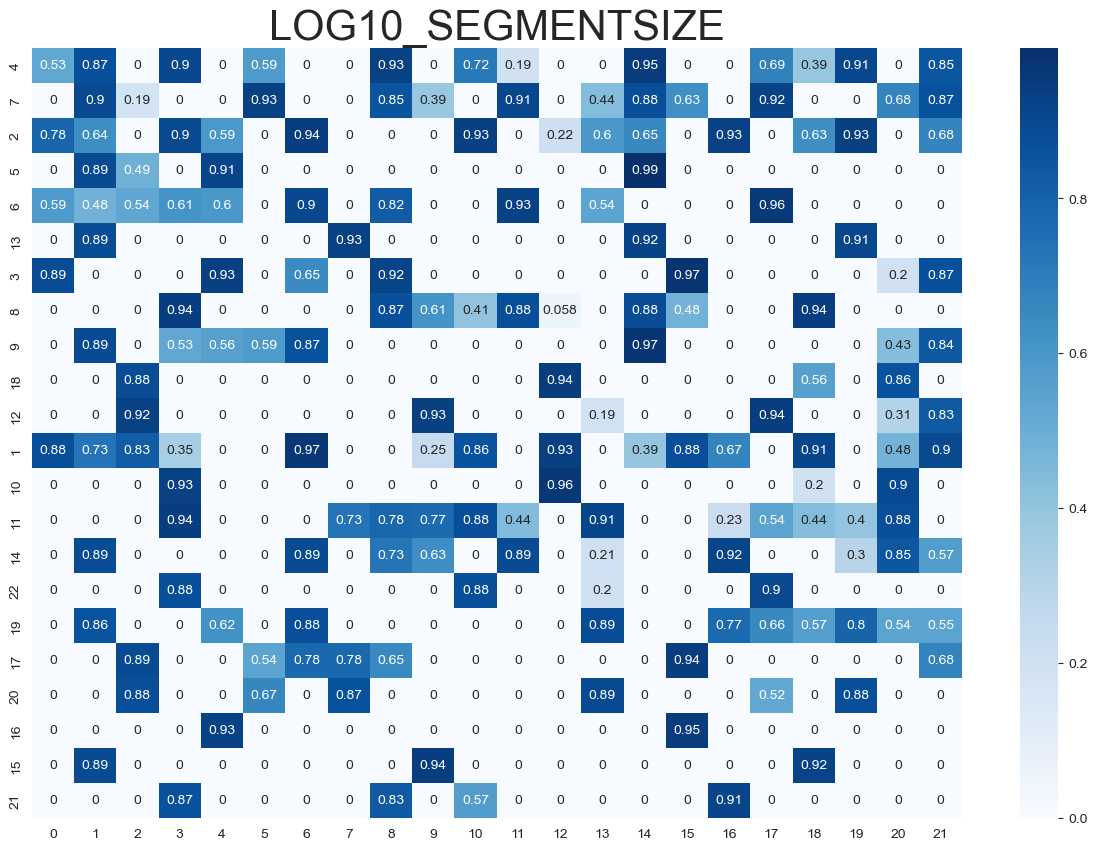

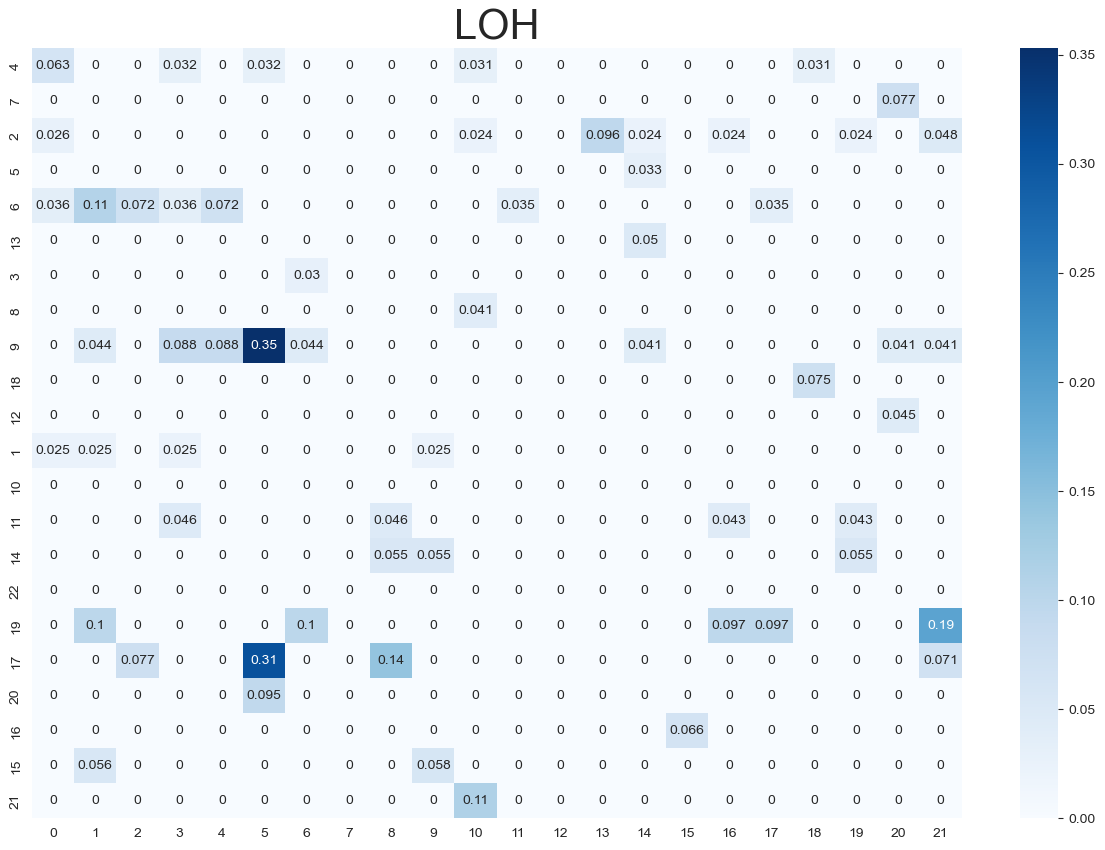

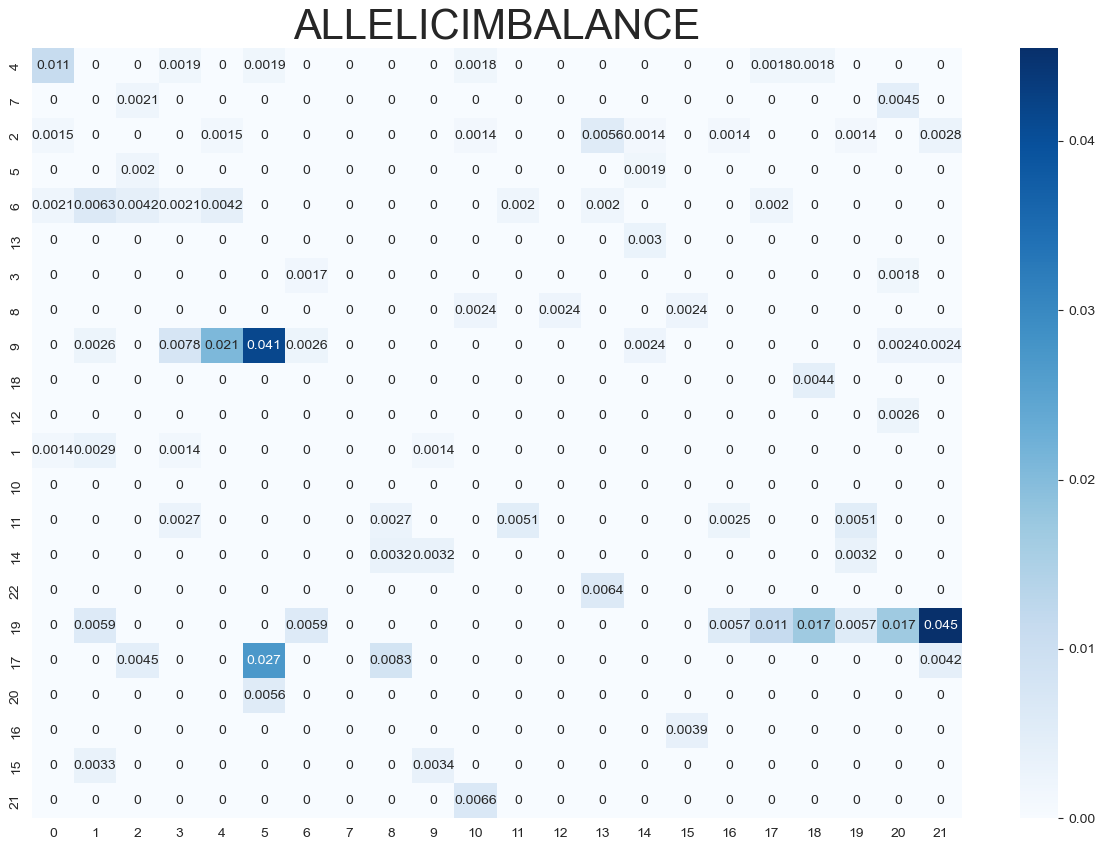

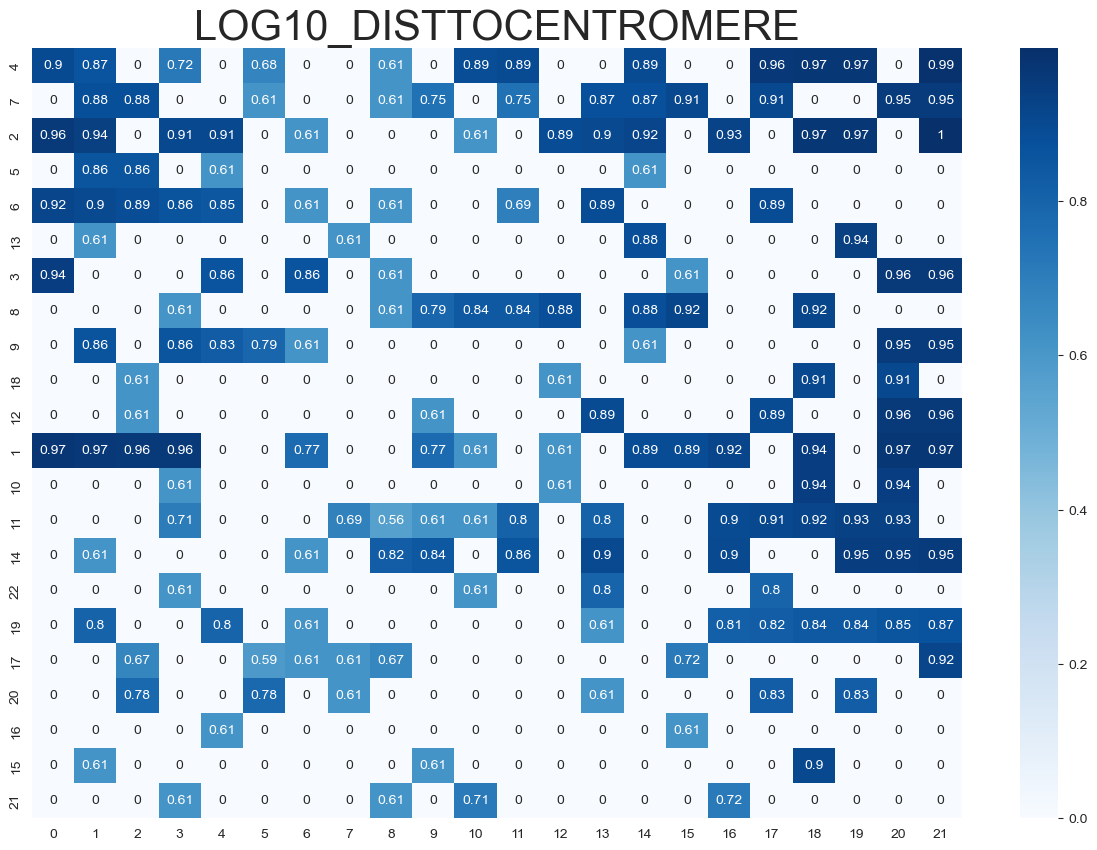

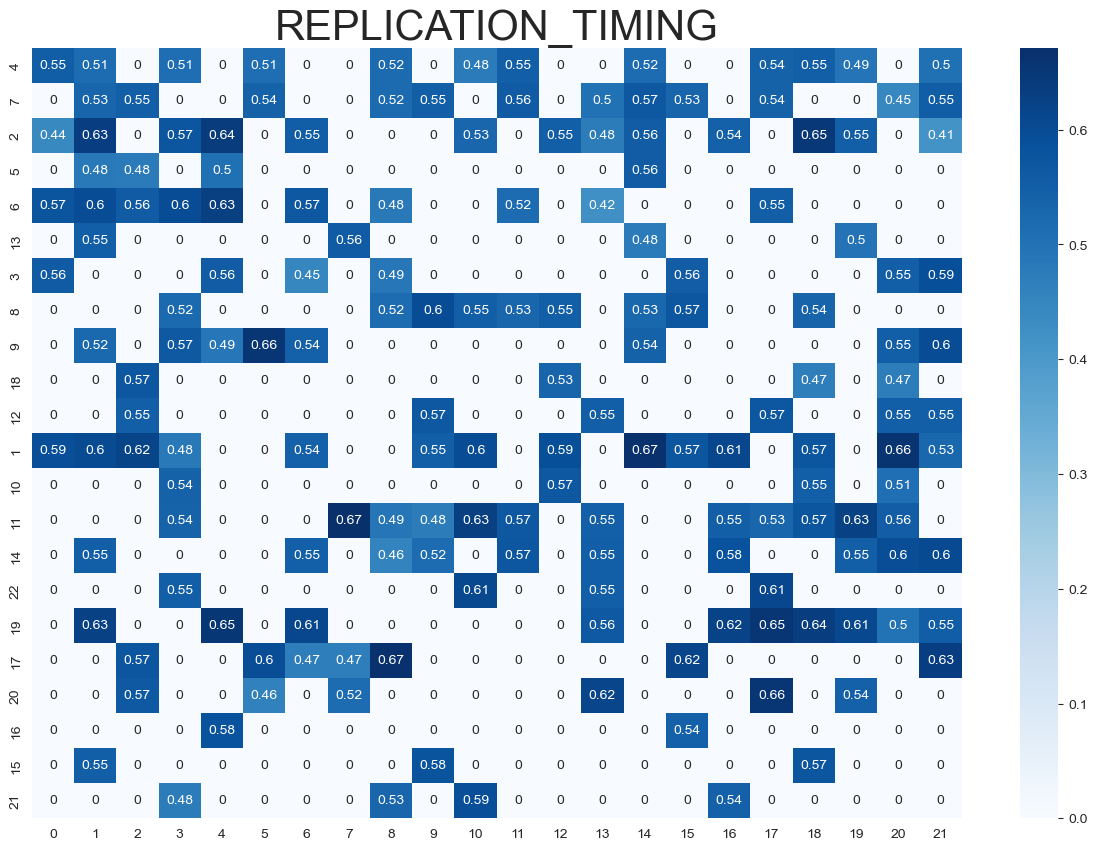

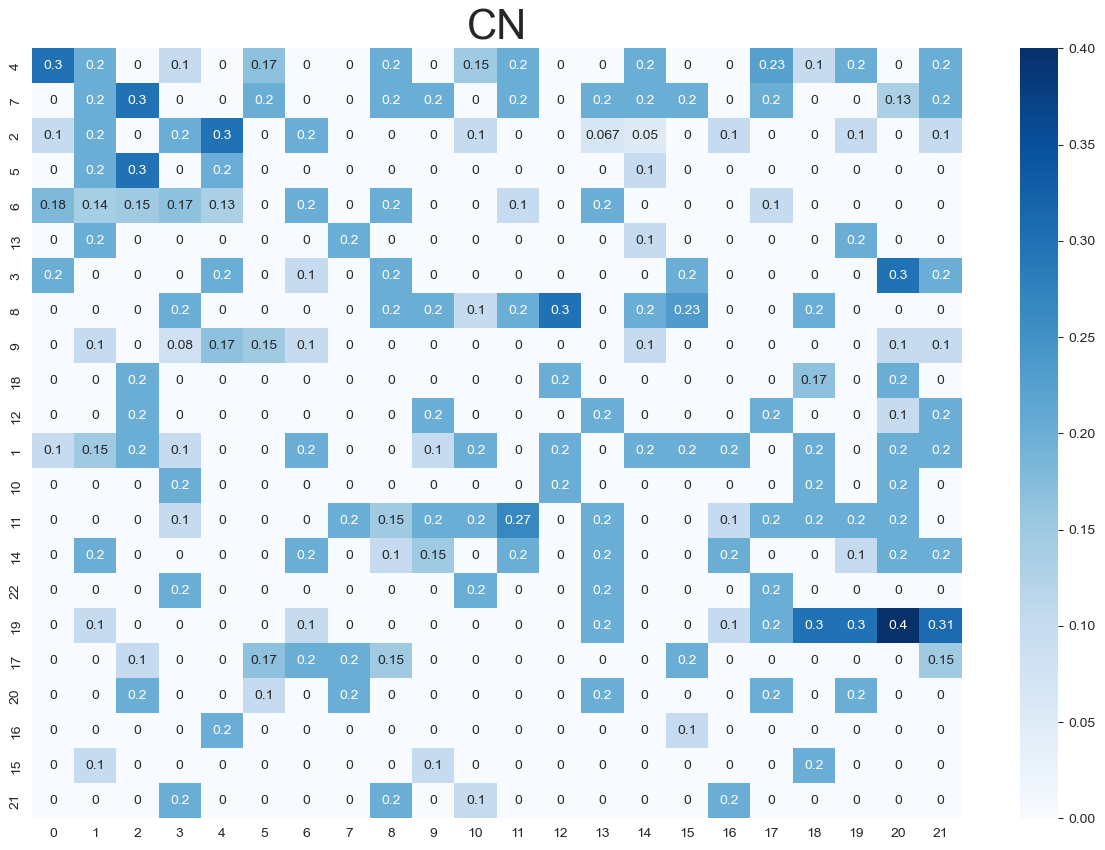

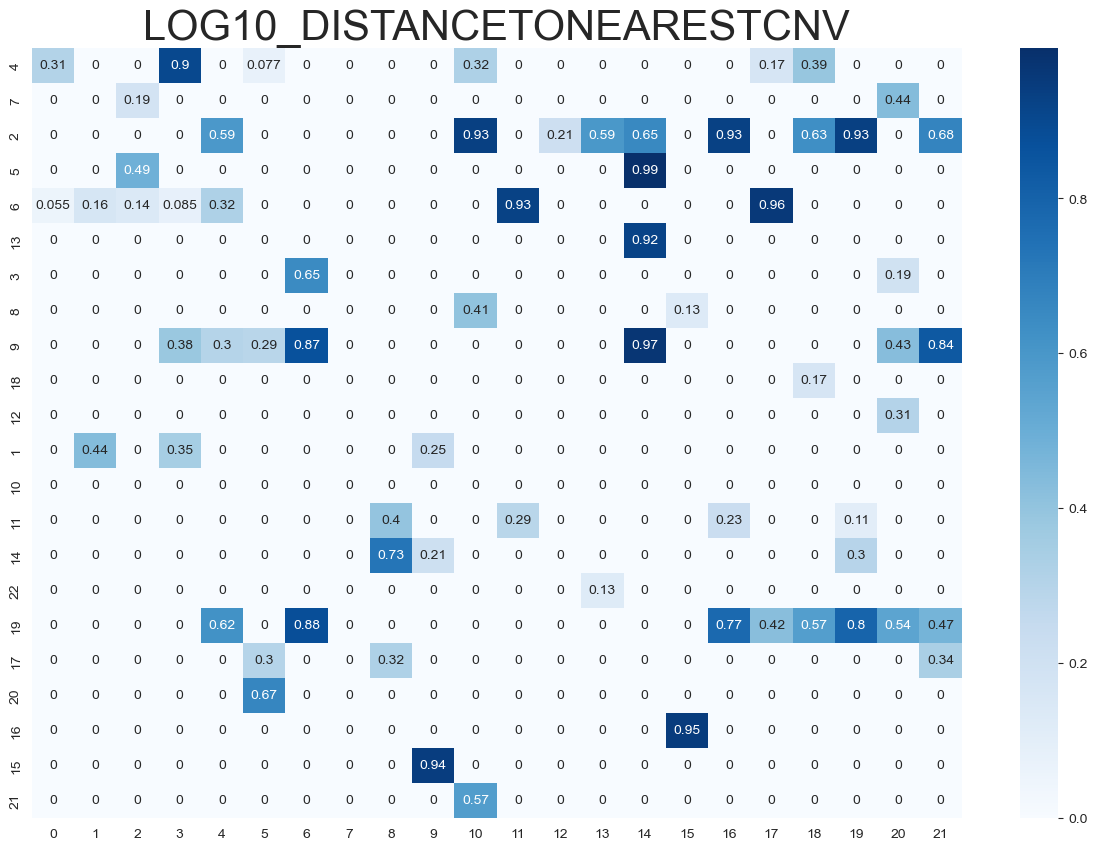

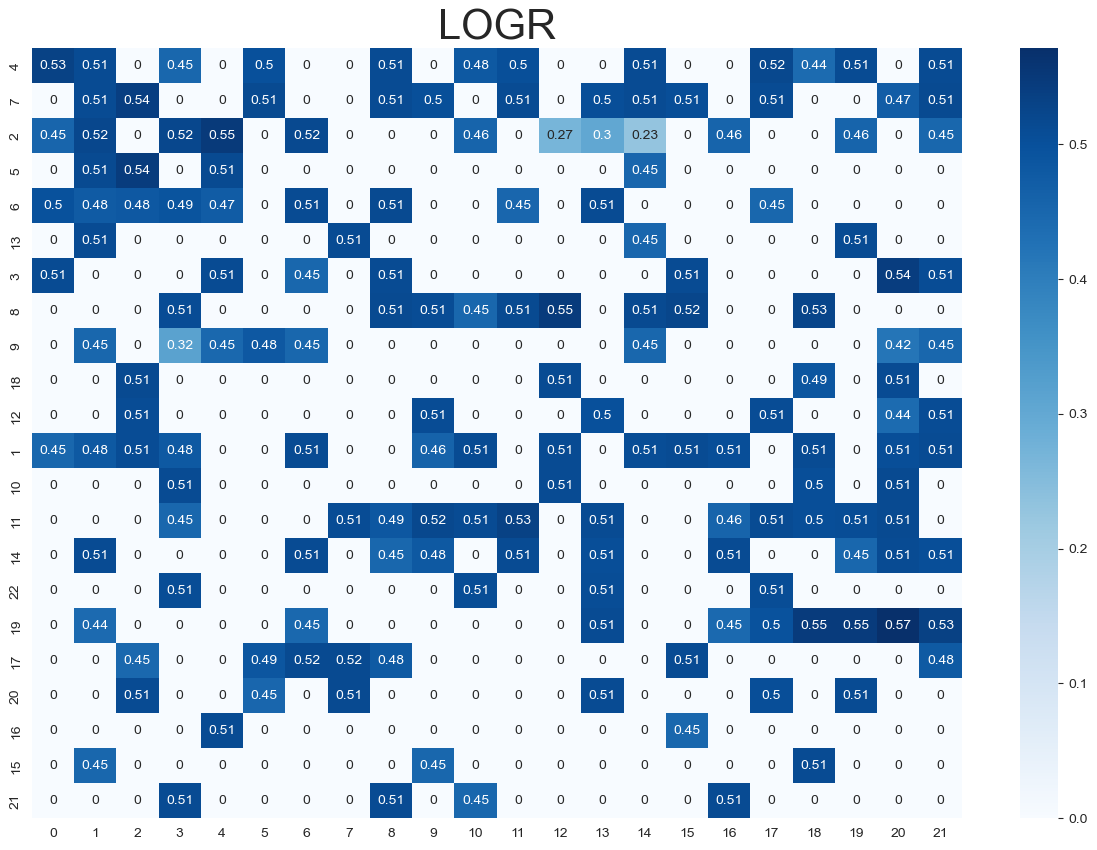

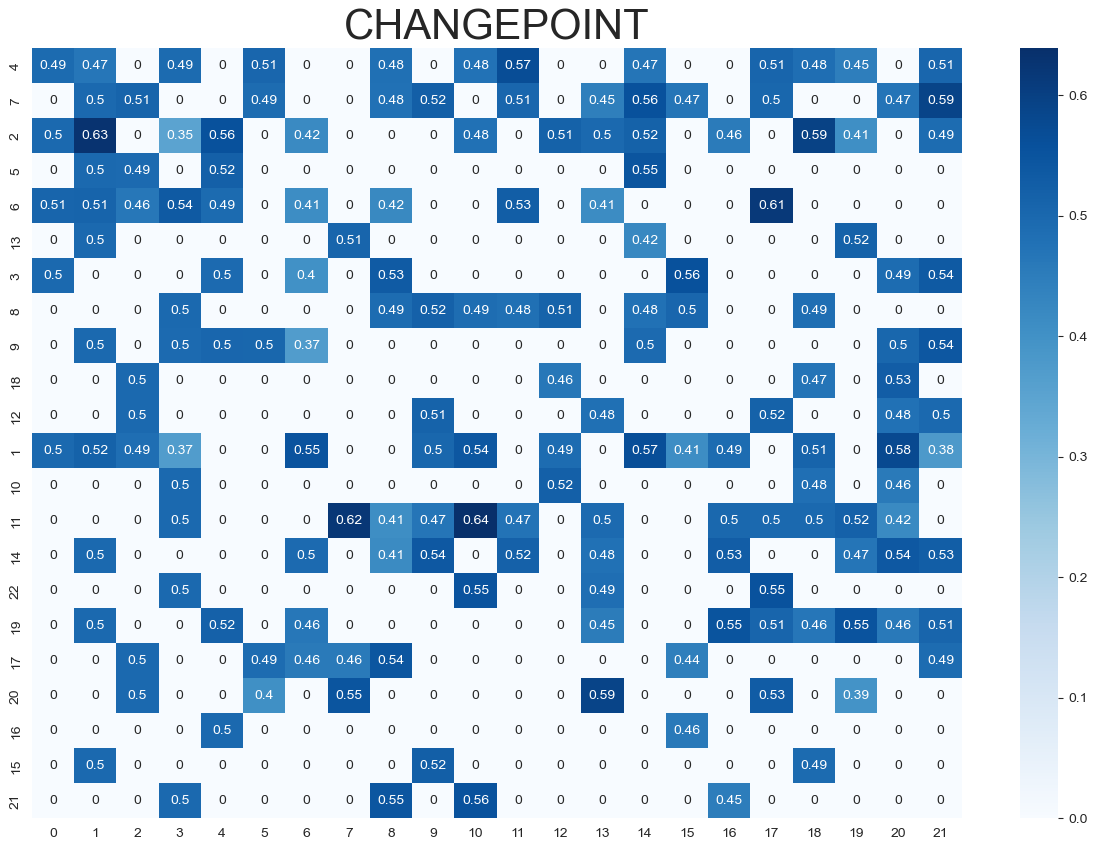

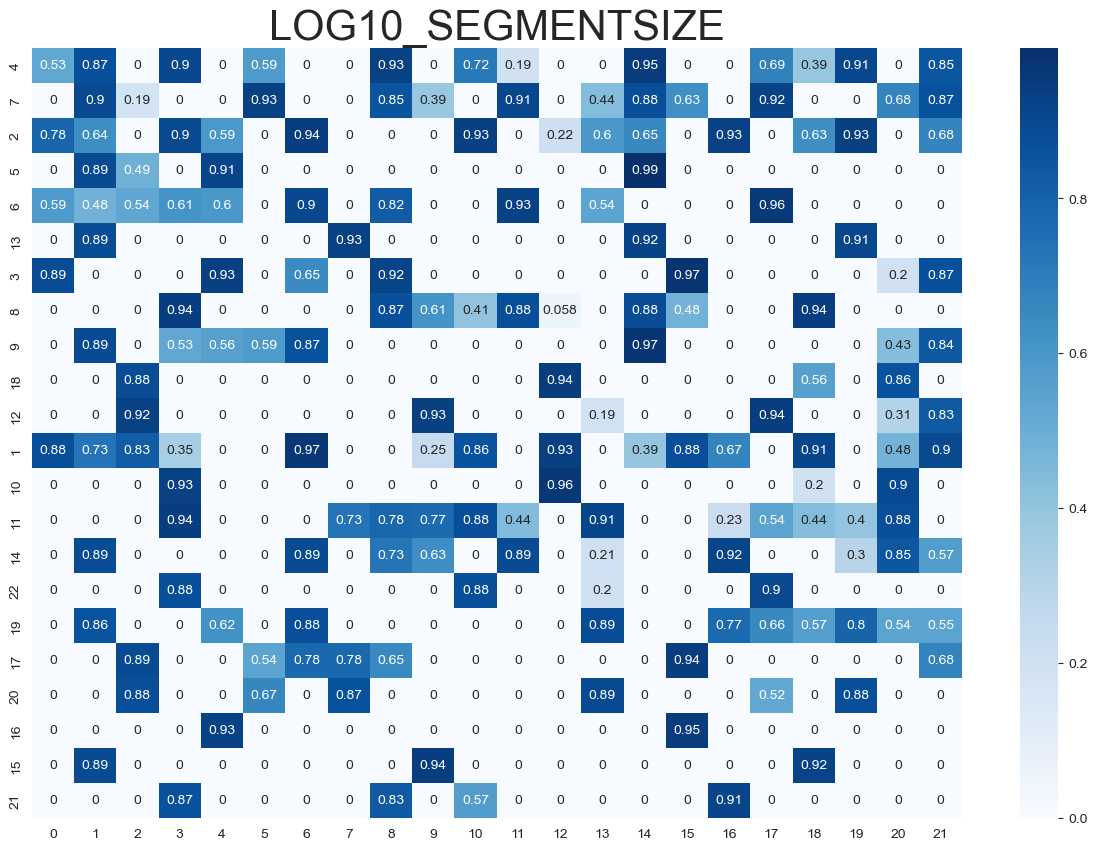

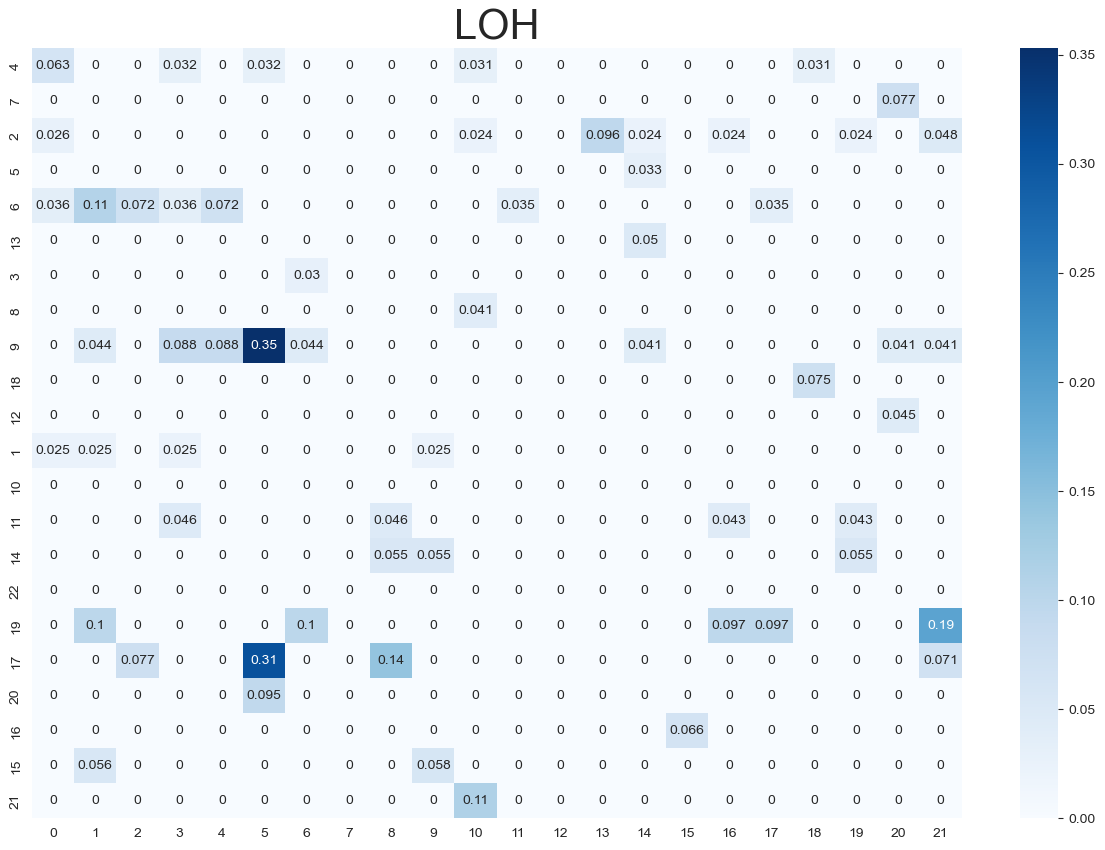

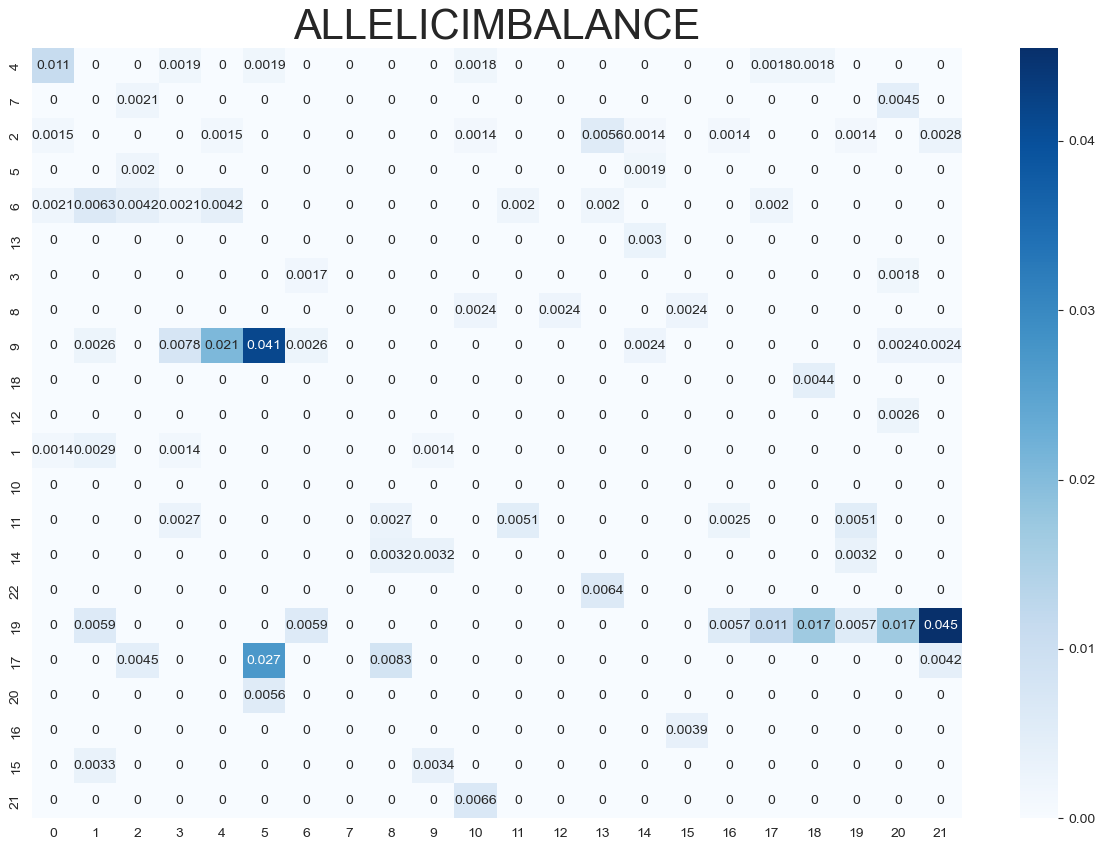

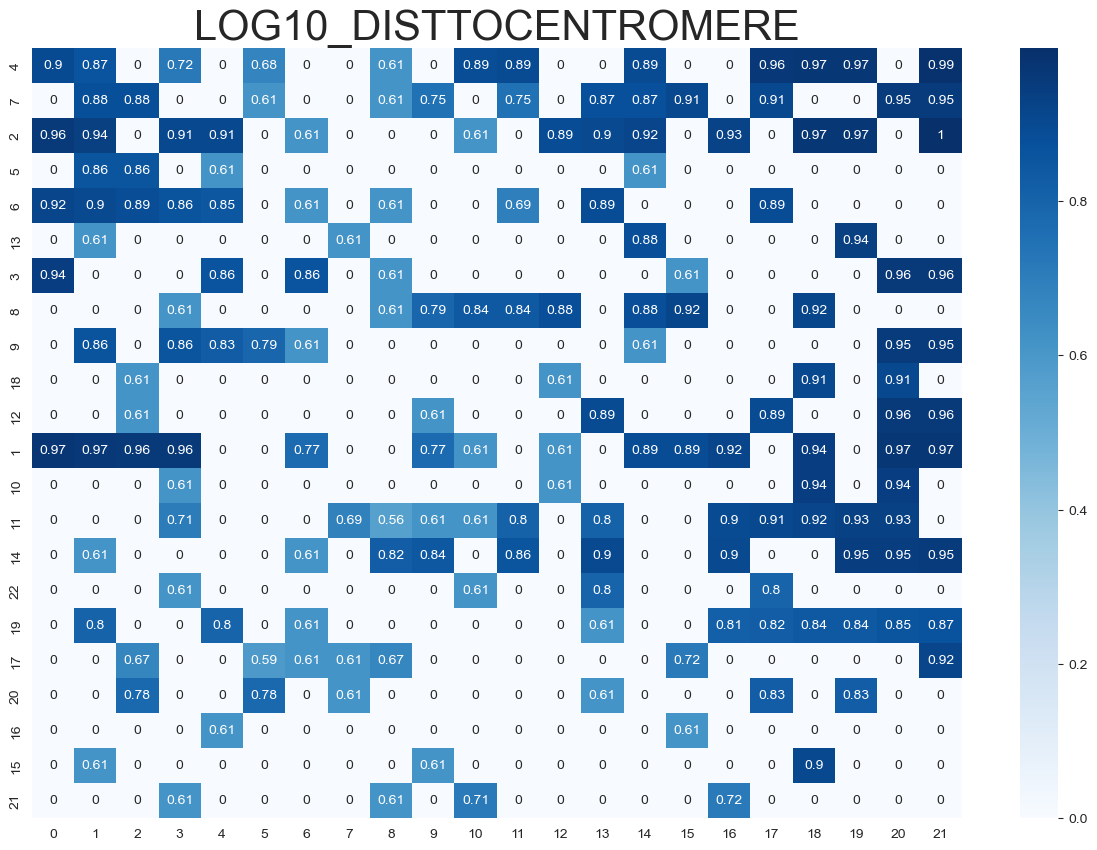

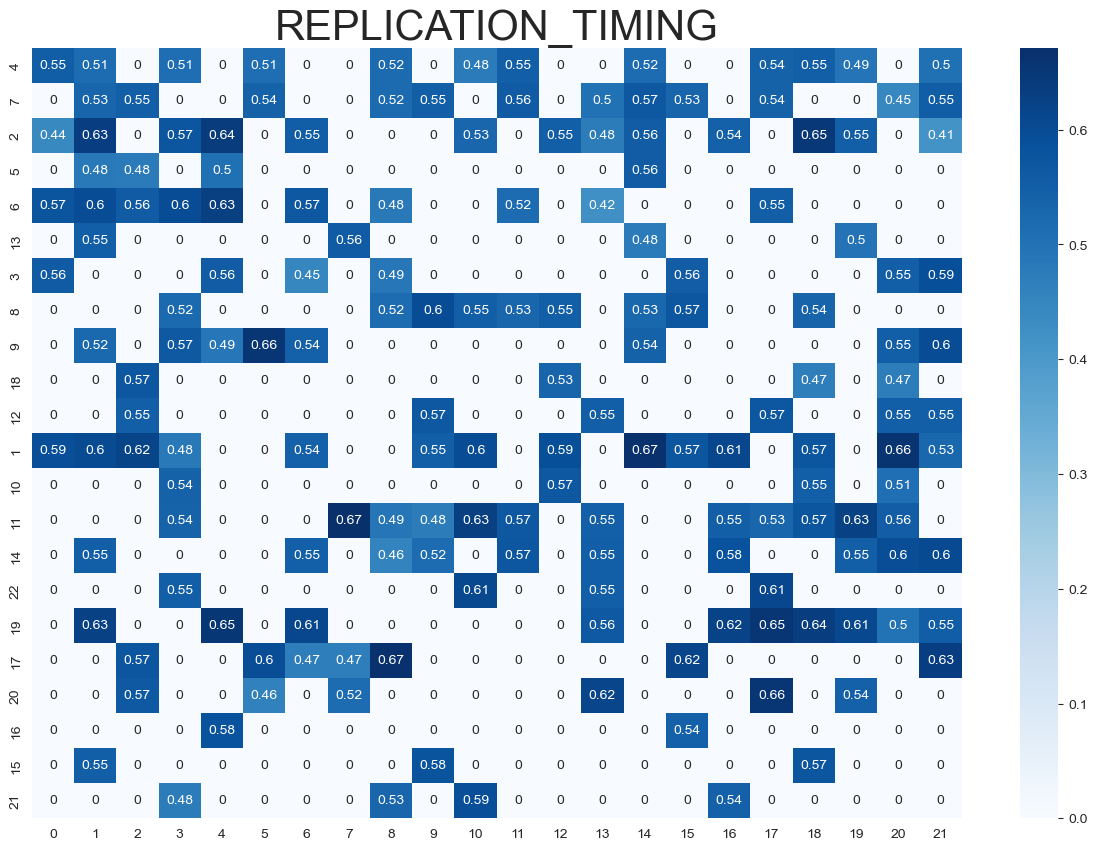

In [116]:
sb.set_style(rc = {'axes.facecolor': 'white'})

for i in range(len(features)):
    fig, ax = plt.subplots(figsize=(15,10))
    sb.heatmap(layers_for_plot[i], annot=True, cmap=sb.color_palette("Blues", as_cmap=True),ax=ax).set_title(features[i].upper(),fontsize=30)


In [115]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Surface(z=layers_for_plot[0], showscale=False, opacity=0.9,name=features[0]),
    go.Surface(z=layers_for_plot[1]+10, showscale=False, opacity=0.9,name=features[1]),
    go.Surface(z=layers_for_plot[2]+20, showscale=False, opacity=0.9,name=features[2]),
    go.Surface(z=layers_for_plot[3]+30, showscale=False, opacity=0.9,name=features[3]),
    go.Surface(z=layers_for_plot[4]+40, showscale=False, opacity=0.9,name=features[4]),
    go.Surface(z=layers_for_plot[5]+50, showscale=False, opacity=0.9,name=features[5]),
    go.Surface(z=layers_for_plot[6]+60, showscale=False, opacity=0.9,name=features[6]),
    go.Surface(z=layers_for_plot[7]+70, showscale=False, opacity=0.9,name=features[7]),
    go.Surface(z=layers_for_plot[8]+80, showscale=False, opacity=0.9,name=features[8])
])
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0,
        pad=0
    )
)
fig.show()

In [13]:
import feature_util
all_features = readPickle("{}/data/output/merged_features.pickle".format(feature_util.mac_path))
all_features_grouped_by_id = all_features.groupby('ID').agg('mean')[features]

all_features_grouped_by_id.to_csv("{}/data/output/all_features_grouped_by_id.csv".format(feature_util.mac_path))

/var/folders/60/8d0682lj2wn2_klg3nt0f58wr11m0s/T/ipykernel_41994/149228760.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_features_grouped_by_id = all_features.groupby('ID').agg('mean')[features]
